In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import gamma
from scipy.stats import uniform
import statsmodels.formula.api as smf  
np.random.seed(12578)

### Statistical Distributions
In the demo, we will be evaluating cdf and pdf's, building likelihood and log-likelihood functions, taking random samples and perhaps other statistical operations. We will primarily use the scipy family of distributions. 

Evaluating pdf's and cdf's:

In [7]:
mean = 0
y = 1.5
std = 1
print("PDF value") 
print(norm(mean,std).pdf(y))
print("CDF value")
print(norm(mean,std).cdf(y))

PDF value
0.12951759566589174
CDF value
0.9331927987311419


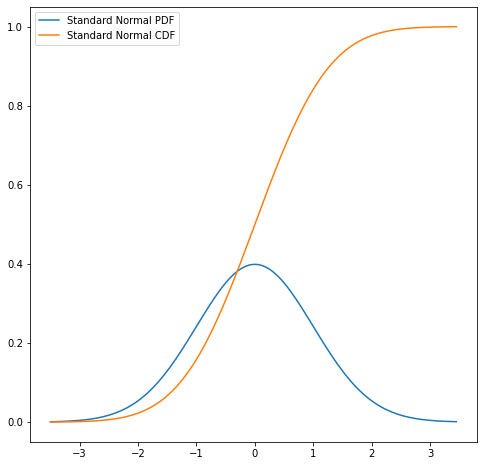

In [8]:
# use these for some plots
y = np.arange(-3.5,3.5,.05)

pdf_cdf_values = np.zeros((y.shape[0],3))
pdf_cdf_values[:,0] = y
pdf_cdf_values[:,1] = norm(mean,std).pdf(y)
pdf_cdf_values[:,2] = norm(mean,std).cdf(y)

   
plt.figure(figsize=(8,8))
plt.plot(pdf_cdf_values[:,0],pdf_cdf_values[:,1],label="Standard Normal PDF")
plt.plot(pdf_cdf_values[:,0],pdf_cdf_values[:,2],label="Standard Normal CDF")
plt.legend(loc='upper left')
plt.show()

### Random Variables
Let's draw some random numbers from the normal distribution. This time, instead of using mean 0 and standard deviation of 1, let's assume the distribution is centered at 10 with a standard deviation of 2. Draw 100 random variables:

In [51]:
mean = 10
std = 2
N = 10
y = norm(mean,std).rvs(N)
print(y)

[10.62939829  8.76205787 12.61455986  9.2832514  10.69629807  9.59325249
  8.43041445 12.31577538 10.97511733  6.83821592]


In [1]:
##Stats & plots


## Frequentist example
### Likelihood functions
Suppose the values y are observed and we want to calculate the likelihood of y given a mean for each of the 100 observations in y. Even though we know the mean above should be 10, let's calculate the likelihood of y given a mean of 10.3 and a standard deviation of 2 assuming y is distributed normal. Note these are simply pdf values for each datapoint:

$L_i(y_i|\mu, \sigma) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(y_i-\mu)^2}{2\sigma^2}}$

We can also easily calculate the joint likelihood. This is

For computational advantages, we usually, work with log likelihoods

Let's visualize the log-likelihood function

In [4]:
mu_candidate = np.arange(7,13,0.05) # plot likelihood and log-likelihood in this range

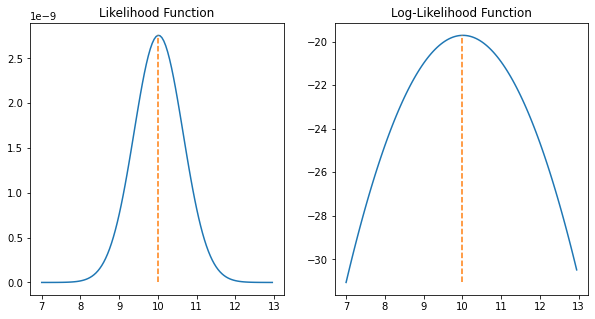

In [52]:
like_loglike_values = np.zeros((mu_candidate.shape[0],3))

row_index=0
for i in mu_candidate:
    like_loglike_values[row_index,0] = i
    like_loglike_values[row_index,1] = norm(i,2).pdf(y).prod()
    like_loglike_values[row_index,2] = norm(i,2).logpdf(y).sum()
    row_index+=1

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.title('Likelihood Function')
plt.plot(like_loglike_values[:,0],like_loglike_values[:,1],label="Likelihood Function")
plt.plot([10,10],[min(like_loglike_values[:,1]),max(like_loglike_values[:,1])],'--')
plt.subplot(122)
plt.plot(like_loglike_values[:,0],like_loglike_values[:,2],label="Log-Likelihood Function")
plt.plot([10,10],[min(like_loglike_values[:,2]),max(like_loglike_values[:,2])],'--')
plt.title('Log-Likelihood Function')
plt.show()

In [53]:
ind1 = np.argmax(like_loglike_values[:,1])
print(mu_candidate[ind1],'MLE Estimate')
print(np.mean(y),'E(y)')
##Note the difference is just numerical issues, in theory, MLE estimate of \mu is the average of y

9.99999999999999 MLE Estimate
10.013834106207561 E(y)


## Bayesian example

Let's examine the posterior, $Prob(\mathbf{y}|\theta), Prob(\theta)$ and see how priors influence the posterior probabilities.  Suppose we have an ultra-simple model: we have only have 1 observation on y :  

* You observe y=7 and know the standard deviation for y is 1.
* You also have strong beliefs based on experience, that the average is 5 with a standard deviation of 2. Denote these beliefs (hyperparameters) as $\mu_0$ and $\sigma_0$.

Letting both $Prob(\mathbf{y}|\theta,\mathbf{x})$ and $Prob(\theta|\mathbf{x}))$ be normal pdf's, we have the likelihood:
$$
Prob(\mathbf{y}|\mu) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(y - \mu)^2}{2\sigma^2}} = \frac{1}{\sqrt{2\pi}} e^{-\frac{(y - \mu)^2}{2}}
$$

and the prior:
$$
P(\mu) = \frac{1}{\sqrt{2\pi \sigma_0^2}} e^{-\frac{(\mu - \mu_0)^2}{2 \sigma_0^2}} = \frac{1}{\sqrt{2\pi 4}} e^{-\frac{(\mu - 5)^2}{2 \times 4}}
$$

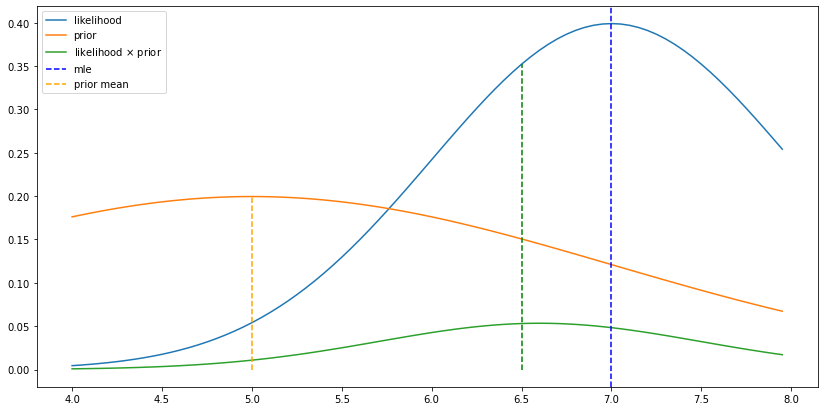

In [9]:
# observed data
y = 7
# std deviation of y
sigma = 1

# prior hyperparameters
mu_0 = 5
sigma_0 = 2 #(this is our prior on std dev of mu_0)


# gen some data along the support of mu and plot likelihood:

mu_plot = np.arange(4,8,.05)

likelihood = norm(mu_plot,sigma).pdf(y)
prior = norm(mu_0,sigma_0).pdf(mu_plot)

plt.figure(figsize=(14,7))
plt.plot(mu_plot,likelihood,label='likelihood')
plt.plot(mu_plot,prior,label='prior')
plt.plot(mu_plot,likelihood*prior,label='likelihood $\\times$ prior')

# plot the mle estimate
plt.axvline(y,c='b',linestyle='--', label='mle')
plt.plot([5,5],[0,norm(mu_0,sigma_0).pdf(mu_0)],c='orange',linestyle='--', label='prior mean')
plt.plot([6.5,6.5],[0,norm(6.5,sigma).pdf(y)],c='g',linestyle='--')
plt.legend(loc='upper left')
plt.show()

### Let's continue the discussion on 10/100 variables
If you have a strong belief that the average is $\mu_0$ with a standard deviation of 2. Denote these beliefs (hyperparameters) as  𝜇0  and  𝜎0 .

[ 8.91819054 10.20642157  7.36022977 10.73033394  7.19867543  6.18730217
 11.43622503  7.71304053  7.45044183  7.70374722] average 8.490460803674768


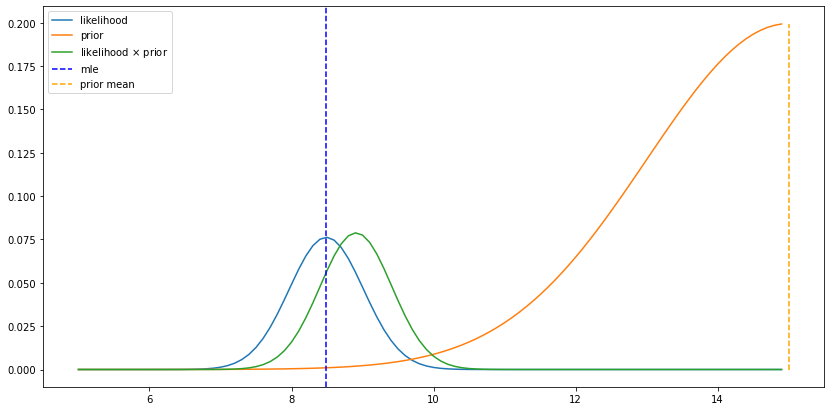

In [49]:
mean = 10
std = 2
N = 10
# observed data
y = norm(mean,std).rvs(N)
print(y,'average',np.mean(y))
# std deviation of y
sigma = np.std(y)

# prior hyperparameters
mu_0 = 15
sigma_0 = 2 #(this is our prior on std dev of mu_0)
# 

# gen some data along the support of mu and plot likelihood:
mu_plot = np.arange(5,15,0.1)
likelihood = [norm(m,sigma).pdf(y).prod() for m in mu_plot]
likelihood = likelihood/sum(likelihood)
prior = norm(mu_0,sigma_0).pdf(mu_plot)

plt.figure(figsize=(14,7))
plt.plot(mu_plot,likelihood,label='likelihood')
plt.plot(mu_plot,prior,label='prior')
plt.plot(mu_plot,likelihood*prior/np.sum(likelihood*prior),label='likelihood $\\times$ prior')

# plot the mle estimate
plt.axvline(np.mean(y),c='b',linestyle='--', label='mle')
plt.plot([mu_0,mu_0],[0,norm(mu_0,sigma_0).pdf(mu_0)],c='orange',linestyle='--', label='prior mean')
#plt.plot([bayes_guess,bayes_guess],[0,norm(bayes_guess,sigma).pdf(y)],c='k',linestyle='--')
plt.legend(loc='upper left')
plt.show()